In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.shape

(891, 12)

In [5]:
df=df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
from sklearn.impute import SimpleImputer

In [8]:
mean_imputer=SimpleImputer(strategy='mean')

In [9]:
df['Age']=mean_imputer.fit_transform(df[['Age']])

In [10]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [11]:
mf_imputer=SimpleImputer(strategy='most_frequent')

In [12]:
df['Embarked']=mf_imputer.fit_transform(df[['Embarked']])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
bins=np.arange(0,82,10)

In [15]:
df['AgeBucket']=pd.cut(df.Age,bins=bins)
df.drop('Age',axis=1,inplace=True)

In [16]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeBucket
0,0,3,male,1,0,7.2500,S,"(20, 30]"
1,1,1,female,1,0,71.2833,C,"(30, 40]"
2,1,3,female,0,0,7.9250,S,"(20, 30]"
3,1,1,female,1,0,53.1000,S,"(30, 40]"
4,0,3,male,0,0,8.0500,S,"(30, 40]"


In [17]:
df=pd.get_dummies(df,columns=['Sex','Pclass','Embarked','AgeBucket'])

In [18]:
df.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,"AgeBucket_(0, 10]","AgeBucket_(10, 20]","AgeBucket_(20, 30]","AgeBucket_(30, 40]","AgeBucket_(40, 50]","AgeBucket_(50, 60]","AgeBucket_(60, 70]","AgeBucket_(70, 80]"
0,0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,1,0,71.2833,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,1,1,0,53.1000,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=df.drop('Survived',axis=1)

In [21]:
y=df.Survived

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 19)
(179, 19)
(712,)
(179,)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train=scaler.transform(X_train)
X_train

array([[-0.47671932, -0.4846737 , -0.37708475, ..., -0.22393636,
        -0.14162382, -0.05307449],
       [-0.47671932, -0.4846737 , -0.477489  , ..., -0.22393636,
        -0.14162382, -0.05307449],
       [-0.47671932,  0.74339631, -0.38710932, ..., -0.22393636,
        -0.14162382, -0.05307449],
       ...,
       [ 3.23283433,  1.97146632, -0.02813399, ..., -0.22393636,
        -0.14162382, -0.05307449],
       [-0.47671932, -0.4846737 , -0.47764939, ..., -0.22393636,
        -0.14162382, -0.05307449],
       [-0.47671932, -0.4846737 , -0.47685315, ..., -0.22393636,
        -0.14162382, -0.05307449]])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
list(zip(X_test.columns, model.coef_.flatten()))

[('SibSp', -0.45047258013645713),
 ('Parch', -0.13513648775739837),
 ('Fare', 0.1290722924815582),
 ('Sex_female', 0.6731134280641424),
 ('Sex_male', -0.6731134280641424),
 ('Pclass_1', 0.4238767727026091),
 ('Pclass_2', 0.06440027664643376),
 ('Pclass_3', -0.41606299828832655),
 ('Embarked_C', 0.1278023390567251),
 ('Embarked_Q', 0.016846721357831183),
 ('Embarked_S', -0.12452241355931788),
 ('AgeBucket_(0, 10]', 0.5201931172138718),
 ('AgeBucket_(10, 20]', -0.036501023268545804),
 ('AgeBucket_(20, 30]', -0.11481369510584868),
 ('AgeBucket_(30, 40]', 0.060469720227273004),
 ('AgeBucket_(40, 50]', -0.13624103200658053),
 ('AgeBucket_(50, 60]', -0.09041840481750552),
 ('AgeBucket_(60, 70]', -0.14753143104722197),
 ('AgeBucket_(70, 80]', -0.2495250831290713)]

([<matplotlib.axis.XTick at 0x2065b2775e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

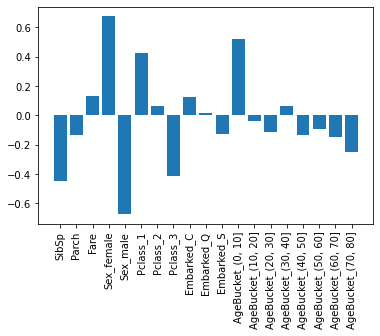

In [30]:
from matplotlib import pyplot as plt
plt.bar(X_test.columns, model.coef_.flatten())
plt.xticks(X_test.columns,rotation=90)

In [31]:
model.intercept_

array([-0.68021713])

In [32]:
y_pred=model.predict(scaler.transform(X_test))
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1], dtype=int64)

In [33]:
list(zip(y_pred,y_test))

[(1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 

In [34]:
#Accuracy

In [35]:
model.score(scaler.transform(X_test),y_test)

0.7988826815642458

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[95, 13],
       [23, 48]], dtype=int64)

In [37]:
from sklearn.metrics import precision_score,recall_score

In [38]:
recall_score(y_test,y_pred)

0.676056338028169

In [39]:
y_prob=model.predict_proba(scaler.transform(X_test))
y_prob

array([[2.33340048e-01, 7.66659952e-01],
       [5.90579209e-02, 9.40942079e-01],
       [9.19244723e-01, 8.07552767e-02],
       [8.95711376e-02, 9.10428862e-01],
       [8.94480945e-01, 1.05519055e-01],
       [8.45188651e-01, 1.54811349e-01],
       [4.24033618e-01, 5.75966382e-01],
       [9.19244723e-01, 8.07552767e-02],
       [8.90324407e-01, 1.09675593e-01],
       [9.19295021e-01, 8.07049787e-02],
       [9.45990902e-01, 5.40090977e-02],
       [6.30257030e-01, 3.69742970e-01],
       [9.45414944e-01, 5.45850563e-02],
       [9.19070746e-01, 8.09292537e-02],
       [8.49686625e-02, 9.15031338e-01],
       [7.36451925e-01, 2.63548075e-01],
       [9.19291218e-01, 8.07087821e-02],
       [9.19132593e-01, 8.08674070e-02],
       [8.84497824e-01, 1.15502176e-01],
       [1.49837697e-01, 8.50162303e-01],
       [7.87125098e-01, 2.12874902e-01],
       [9.19291218e-01, 8.07087821e-02],
       [7.30186471e-01, 2.69813529e-01],
       [8.59523136e-01, 1.40476864e-01],
       [9.013547

In [40]:
y_prob.shape

(179, 2)

In [41]:
y_porb1=y_prob[:,1]
y_porb1

array([0.76665995, 0.94094208, 0.08075528, 0.91042886, 0.10551905,
       0.15481135, 0.57596638, 0.08075528, 0.10967559, 0.08070498,
       0.0540091 , 0.36974297, 0.05458506, 0.08092925, 0.91503134,
       0.26354807, 0.08070878, 0.08086741, 0.11550218, 0.8501623 ,
       0.2128749 , 0.08070878, 0.26981353, 0.14047686, 0.90986452,
       0.06613778, 0.56854242, 0.13688688, 0.08194322, 0.59639648,
       0.91581849, 0.54118013, 0.10948322, 0.04182263, 0.08072707,
       0.1153009 , 0.89204167, 0.48634868, 0.11589933, 0.64144808,
       0.68992389, 0.34959689, 0.10967559, 0.72847322, 0.80099197,
       0.05622519, 0.53900153, 0.08072707, 0.20957601, 0.68812079,
       0.24807646, 0.19982884, 0.08072327, 0.94332412, 0.27699894,
       0.79762615, 0.10969465, 0.08060903, 0.87661628, 0.19302452,
       0.27849327, 0.06755985, 0.24712861, 0.08075528, 0.08072707,
       0.08072707, 0.33664035, 0.39650297, 0.46177773, 0.46031577,
       0.52383208, 0.08072707, 0.2128749 , 0.11368507, 0.52504

In [42]:
list(zip(y_porb1,y_pred))

[(0.7666599519386298, 1),
 (0.9409420791281807, 1),
 (0.08075527674087186, 0),
 (0.9104288623751464, 1),
 (0.10551905454711694, 0),
 (0.15481134944961147, 0),
 (0.5759663820209503, 1),
 (0.08075527674087186, 0),
 (0.10967559316663025, 0),
 (0.08070497869379287, 0),
 (0.05400909773221291, 0),
 (0.36974296982630583, 0),
 (0.05458505629459808, 0),
 (0.08092925370450023, 0),
 (0.9150313375181973, 1),
 (0.2635480747435682, 0),
 (0.08070878205594713, 0),
 (0.08086740698811101, 0),
 (0.11550217610250713, 0),
 (0.850162303174876, 1),
 (0.21287490155983035, 0),
 (0.08070878205594713, 0),
 (0.26981352924245156, 0),
 (0.14047686416651103, 0),
 (0.9098645208943461, 1),
 (0.06613778291586841, 0),
 (0.5685424236491669, 1),
 (0.13688687729407012, 0),
 (0.08194322186438971, 0),
 (0.5963964794048447, 1),
 (0.915818492686799, 1),
 (0.5411801329722489, 1),
 (0.10948321587961493, 0),
 (0.041822632396568755, 0),
 (0.08072706973365126, 0),
 (0.11530090221002982, 0),
 (0.8920416722181951, 1),
 (0.48634867758

In [43]:
from sklearn.metrics import roc_curve

In [44]:
tpr,fpr,t=roc_curve(y_test,y_porb1)

In [45]:
fpr

array([0.        , 0.01408451, 0.25352113, 0.30985915, 0.43661972,
       0.47887324, 0.47887324, 0.49295775, 0.49295775, 0.52112676,
       0.56338028, 0.57746479, 0.57746479, 0.61971831, 0.61971831,
       0.66197183, 0.66197183, 0.67605634, 0.67605634, 0.69014085,
       0.69014085, 0.71830986, 0.71830986, 0.71830986, 0.74647887,
       0.74647887, 0.77464789, 0.77464789, 0.78873239, 0.78873239,
       0.8028169 , 0.8028169 , 0.81690141, 0.81690141, 0.83098592,
       0.83098592, 0.83098592, 0.83098592, 0.83098592, 0.83098592,
       0.83098592, 0.83098592, 0.84507042, 0.84507042, 0.85915493,
       0.85915493, 0.87323944, 0.87323944, 0.90140845, 0.90140845,
       0.91549296, 0.91549296, 0.94366197, 0.94366197, 0.94366197,
       0.94366197, 0.94366197, 0.95774648, 0.97183099, 0.97183099,
       0.97183099, 0.97183099, 0.98591549, 0.98591549, 0.98591549,
       0.98591549, 1.        , 1.        ])

In [46]:
tpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00925926, 0.00925926, 0.02777778, 0.02777778,
       0.03703704, 0.03703704, 0.0462963 , 0.0462963 , 0.11111111,
       0.11111111, 0.12037037, 0.12037037, 0.12962963, 0.12962963,
       0.14814815, 0.14814815, 0.16666667, 0.21296296, 0.21296296,
       0.22222222, 0.22222222, 0.24074074, 0.24074074, 0.26851852,
       0.26851852, 0.32407407, 0.32407407, 0.33333333, 0.34259259,
       0.36111111, 0.37962963, 0.38888889, 0.40740741, 0.41666667,
       0.43518519, 0.46296296, 0.47222222, 0.48148148, 0.48148148,
       0.51851852, 0.52777778, 0.56481481, 0.57407407, 0.60185185,
       0.60185185, 0.61111111, 0.62962963, 0.66666667, 0.71296296,
       0.76851852, 0.77777778, 0.7962963 , 0.7962963 , 0.80555556,
       0.83333333, 0.88888889, 0.88888889, 0.93518519, 0.9537037 ,
       0.99074074, 0.99074074, 1.        ])

In [47]:
t

array([1.95088426e+00, 9.50884258e-01, 8.59554458e-01, 8.57584835e-01,
       7.58514631e-01, 7.33595785e-01, 7.28473219e-01, 6.89923886e-01,
       6.87203276e-01, 6.74611678e-01, 6.74568830e-01, 6.69171034e-01,
       6.41448076e-01, 6.07106996e-01, 5.68542424e-01, 5.31951704e-01,
       5.25043467e-01, 5.23832078e-01, 4.86348678e-01, 4.82906001e-01,
       4.61777725e-01, 4.60254546e-01, 4.44207031e-01, 4.02107358e-01,
       3.77214507e-01, 3.74323997e-01, 3.69742970e-01, 3.49596891e-01,
       3.36640349e-01, 2.98385677e-01, 2.78493271e-01, 2.47128607e-01,
       2.45344624e-01, 2.13288154e-01, 2.12874902e-01, 1.99828837e-01,
       1.93986078e-01, 1.93024525e-01, 1.89025616e-01, 1.65691133e-01,
       1.54811349e-01, 1.39006774e-01, 1.36886877e-01, 1.34524258e-01,
       1.28305495e-01, 1.15533653e-01, 1.15502176e-01, 1.09694655e-01,
       1.09675593e-01, 1.05519055e-01, 9.26812561e-02, 9.04033923e-02,
       9.00740274e-02, 8.08674070e-02, 8.07552767e-02, 8.07270697e-02,
      

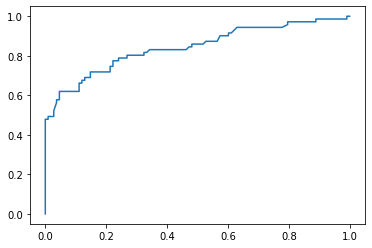

In [48]:
plt.plot(tpr,fpr)

In [49]:
from sklearn.metrics import auc

In [50]:
auc(tpr,fpr)

0.8425925925925926